# Métodos Numéricos 

**Nombre:** Luis Alexander Lema Delgado
**Materia:** Métodos Numéricos  
**Fecha:** 12/05/2025

### Método de Mínimos Cuadrados

Coeficientes ajustados:
a0 = 1.280556
a1 = -5.156451
a2 = 1.826720
a3 = 3.841226


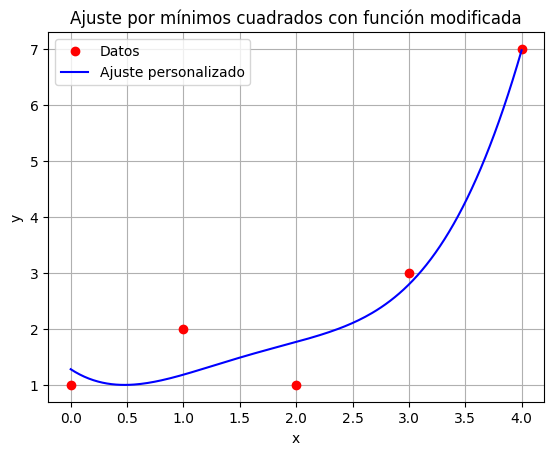

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def eliminacion_gaussiana(A, b):
    n = len(b)
    # Eliminación hacia adelante
    for i in range(n):
        # Buscar pivote
        max_fila = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_fila] = A[max_fila], A[i]
        b[i], b[max_fila] = b[max_fila], b[i]
        
        pivote = A[i][i]
        for j in range(i, n):
            A[i][j] /= pivote
        b[i] /= pivote
        
        for k in range(i+1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]

    # Sustitución hacia atrás
    x = [0]*n
    for i in range(n-1, -1, -1):
        x[i] = b[i] - sum(A[i][j]*x[j] for j in range(i+1, n))
    return x

def minimos_cuadrados_modificado(x, y):
    """
    Ajusta una función tipo: a0 + a1*x + a2*x^2 + a3*sin(x)
    usando mínimos cuadrados, con resolución manual del sistema normal.
    """
    n = len(x)
    # Construir matriz de diseño X con columnas: 1, x, x^2, sin(x)
    X = []
    for i in range(n):
        X.append([1, x[i], x[i]**2, math.sin(x[i])])

    # Calcular A = X^T X y b = X^T y
    m = 4  # número de coeficientes
    A = [[0]*m for _ in range(m)]
    b_vec = [0]*m

    for i in range(m):
        for j in range(m):
            A[i][j] = sum(X[k][i] * X[k][j] for k in range(n))
        b_vec[i] = sum(X[k][i] * y[k] for k in range(n))

    coeficientes = eliminacion_gaussiana(A, b_vec)

    print("Coeficientes ajustados:")
    print(f"a0 = {coeficientes[0]:.6f}")
    print(f"a1 = {coeficientes[1]:.6f}")
    print(f"a2 = {coeficientes[2]:.6f}")
    print(f"a3 = {coeficientes[3]:.6f}")

    x_plot = np.linspace(min(x), max(x), 200)
    y_plot = [coeficientes[0] + coeficientes[1]*xi + coeficientes[2]*xi**2 + coeficientes[3]*math.sin(xi) for xi in x_plot]

    plt.plot(x, y, 'ro', label="Datos")
    plt.plot(x_plot, y_plot, 'b-', label="Ajuste personalizado")
    plt.title("Ajuste por mínimos cuadrados con función modificada")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejemplo
x = [0, 1, 2, 3, 4]
y = [1, 2, 1, 3, 7]
minimos_cuadrados_modificado(x, y)


